In [37]:
import numpy as np
import pandas as pd
import sklearn
df = pd.read_csv('/Users/Jiwon/Documents/GitHub/advanced_project/jiwon_project/csv_files/preprocessing_filtered.csv')

In [38]:
df

,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price,estimated_occupancy_l365d,estimated_revenue_l365d,availability_60,availability_365,instant_bookable,...,neighborhood_overview_exists,host_about_length_group,host_is_superhost,host_has_profile_pic,host_identity_verified,host_response_time_score,host_response_rate_score,host_acceptance_rate_score,host_location_ny,host_location_boolean
0,Prospect Heights,Brooklyn,40.673760,-73.966110,200.0,0,0.0,57,362,0,...,1,long,0,1,1,4.0,4,4,1,1
1,East Harlem,Manhattan,40.792454,-73.940742,82.0,0,0.0,0,204,0,...,1,empty,0,1,1,4.0,4,4,1,1
2,Boerum Hill,Brooklyn,40.684420,-73.980680,765.0,0,0.0,49,326,0,...,1,long,0,1,1,3.0,4,2,1,1
3,Harlem,Manhattan,40.818058,-73.946671,139.0,255,35445.0,18,25,0,...,1,long,1,1,1,4.0,4,4,1,1
4,Williamsburg,Brooklyn,40.710651,-73.950874,130.0,154,20020.0,22,38,0,...,1,long,1,1,1,4.0,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,Harlem,Manhattan,40.813794,-73.952399,72.0,0,0.0,53,358,0,...,0,empty,0,1,1,4.0,4,4,1,1
22304,Bedford-Stuyvesant,Brooklyn,40.685500,-73.919510,58.0,0,0.0,58,363,0,...,0,long,1,1,1,4.0,4,4,1,1
22305,Kips Bay,Manhattan,40.745290,-73.979380,299.0,0,0.0,39,99,0,...,0,empty,0,1,1,4.0,4,4,0,1
22306,Theater District,Manhattan,40.757133,-73.983124,200.0,0,0.0,60,365,1,...,0,long,0,1,1,4.0,4,4,1,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22308 entries, 0 to 22307
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_cleansed        22308 non-null  object 
 1   neighbourhood_group_cleansed  22308 non-null  object 
 2   latitude                      22308 non-null  float64
 3   longitude                     22308 non-null  float64
 4   price                         22308 non-null  float64
 5   estimated_occupancy_l365d     22308 non-null  int64  
 6   estimated_revenue_l365d       22308 non-null  float64
 7   availability_60               22308 non-null  int64  
 8   availability_365              22308 non-null  int64  
 9   instant_bookable              22308 non-null  int64  
 10  is_long_term                  22308 non-null  int64  
 11  is_activate                   22308 non-null  int64  
 12  amenities                     22308 non-null  object 
 13  a

In [40]:
df.isnull().sum()

neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
latitude                         0
longitude                        0
price                            0
estimated_occupancy_l365d        0
estimated_revenue_l365d          0
availability_60                  0
availability_365                 0
instant_bookable                 0
is_long_term                     0
is_activate                      0
amenities                        0
amenities_cnt                    0
room_type                        0
structure_type                  28
structure_category               0
accommodates                     0
bath_score_mul                   0
beds                             0
number_of_reviews                0
number_of_reviews_ltm            0
number_of_reviews_l30d           0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_locati

In [41]:
# structure_type 결측치 제거

df['structure_type'] = df['structure_type'].fillna('rental_unit')

In [42]:
df['structure_type'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
22303    False
22304    False
22305    False
22306    False
22307    False
Name: structure_type, Length: 22308, dtype: bool

In [43]:
df[['room_type', 'structure_type', 'structure_category', 'accommodates', 'bath_score_mul', 'beds']]

,room_type,structure_type,structure_category,accommodates,bath_score_mul,beds
0,Private room,rental unit,Residential,1,0.5,1
1,Private room,condo,Residential,2,1.0,1
2,Private room,home,Residential,2,2.5,5
3,Entire home/apt,home,Residential,2,1.0,1
4,Private room,rental unit,Residential,2,0.5,1
...,...,...,...,...,...,...
22303,Private room,rental unit,Residential,1,0.5,1
22304,Private room,rental unit,Residential,2,1.0,1
22305,Entire home/apt,rental unit,Residential,5,2.0,3
22306,Entire home/apt,rental unit,Residential,4,1.0,2


In [44]:
# 필요 없는 컬럼 삭제 

drop_cols = ['latitude', 'longitude', 'availability_60', 'amenities', 'number_of_reviews_l30d', 'structure_category', 'id', 'host_id']
df= df.drop(drop_cols, axis=1)

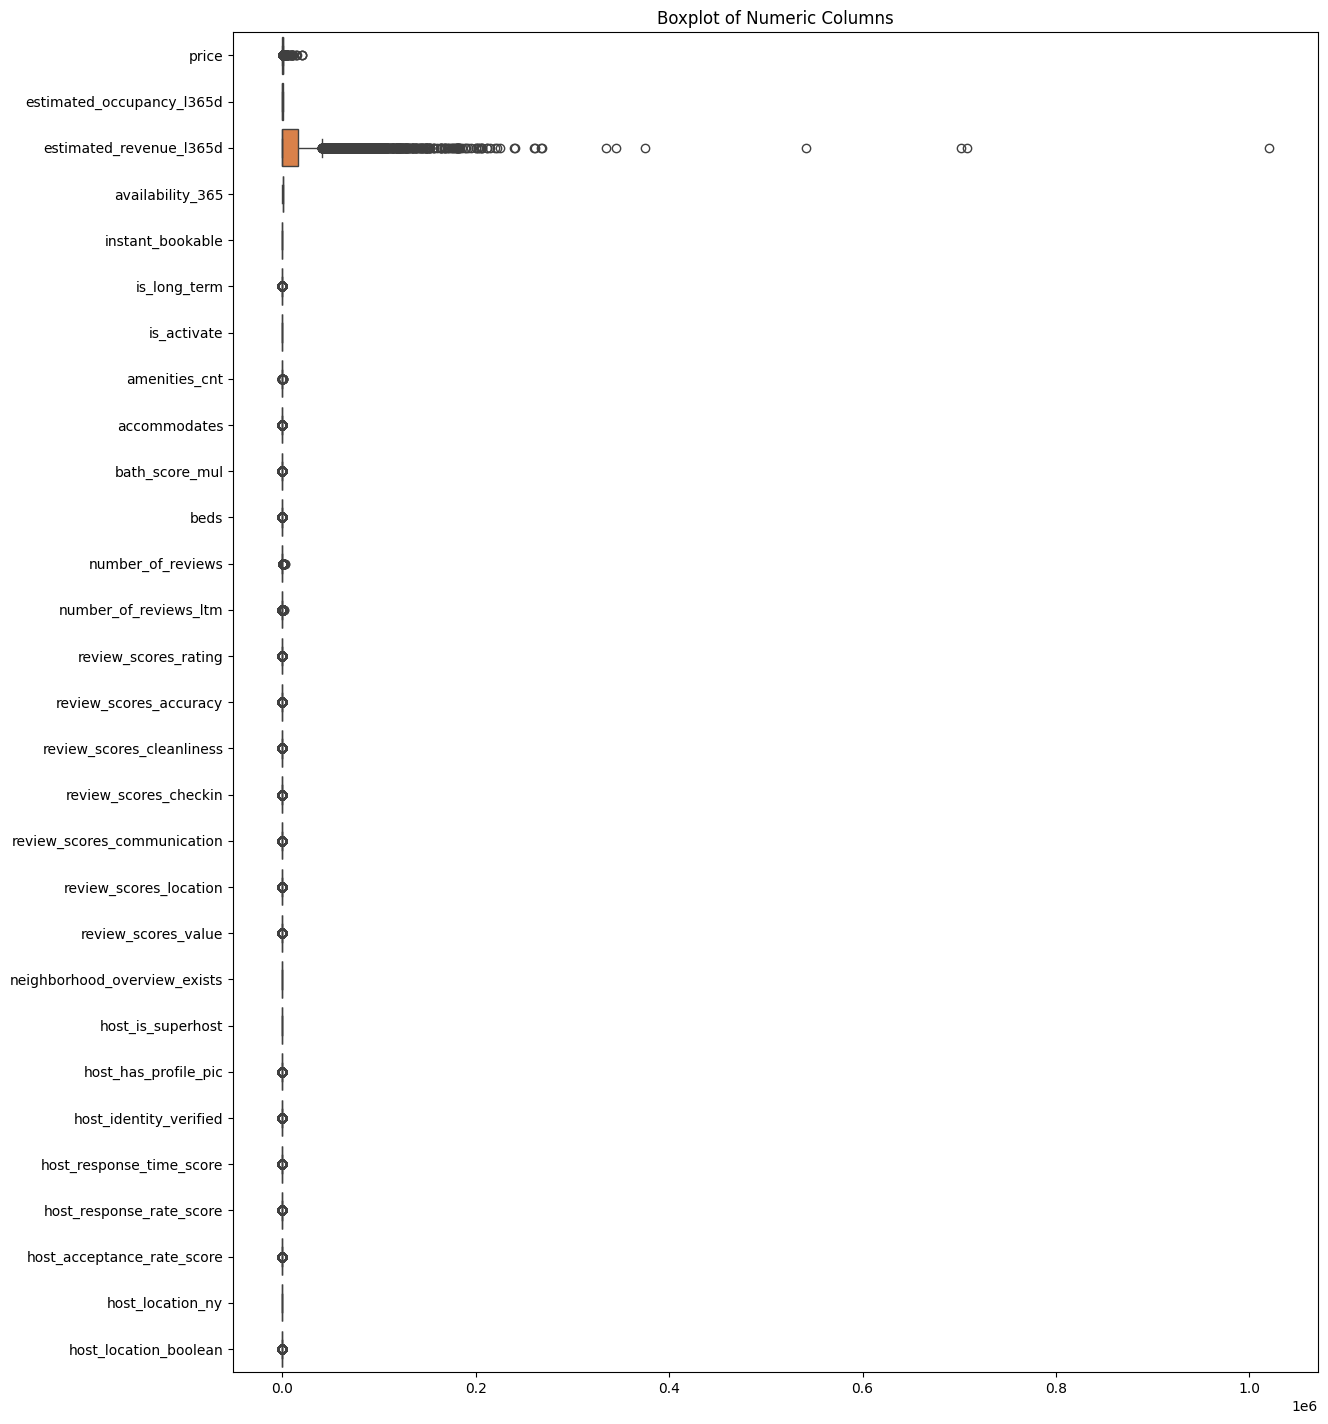

In [45]:
# 이상치 boxplot  ---> 우선 이상치 제거 안하고 하기로 함. 종속 변수들을 놓고, y변수는 estimated_revenue_l365d 가 될 것

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(14, len(num_cols)*0.6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title('Boxplot of Numeric Columns')
plt.show()


In [46]:
# 인코딩
from sklearn.preprocessing import LabelEncoder

# town => 라벨 인코딩
le = LabelEncoder()
df['town_encoded'] = le.fit_transform(df['neighbourhood_cleansed'])
df = df.drop('neighbourhood_cleansed', axis=1)

# borough ==> 원핫 인코딩
df = pd.get_dummies(df, columns=['neighbourhood_group_cleansed'])

# room_type ==> 원핫 인코딩
df = pd.get_dummies(df, columns=['room_type'])

# structure_type ==> 라벨 인코딩
df['structure_encoded'] = le.fit_transform(df['structure_type'])
df = df.drop('structure_type', axis=1)

# name, description_length, host_about_length ==> 매핑으로 라벨 인코딩
# 예시
name_map = {'short_or_med': 0, 'long': 1}
desc_map = {'empty': 0, 'short_or_avg': 1, 'long': 2}
about_map = {'empty': 0, 'short_or_med': 1, 'long': 2}

df['name_length_group'] = df['name_length_group'].map(name_map)
df['description_length_group'] = df['description_length_group'].map(desc_map)
df['host_about_length_group'] = df['host_about_length_group'].map(about_map)


In [47]:
df

,price,estimated_occupancy_l365d,estimated_revenue_l365d,availability_365,instant_bookable,is_long_term,is_activate,amenities_cnt,accommodates,bath_score_mul,...,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,structure_encoded
0,200.0,0,0.0,362,0,1,0,7,1,0.5,...,False,True,False,False,False,False,False,True,False,23
1,82.0,0,0.0,204,0,1,1,32,2,1.0,...,False,False,True,False,False,False,False,True,False,8
2,765.0,0,0.0,326,0,0,1,68,2,2.5,...,False,True,False,False,False,False,False,True,False,14
3,139.0,255,35445.0,25,0,0,1,47,2,1.0,...,False,False,True,False,False,True,False,False,False,14
4,130.0,154,20020.0,38,0,0,1,29,2,0.5,...,False,True,False,False,False,False,False,True,False,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,72.0,0,0.0,358,0,1,0,5,1,0.5,...,False,False,True,False,False,False,False,True,False,23
22304,58.0,0,0.0,363,0,1,0,7,2,1.0,...,False,True,False,False,False,False,False,True,False,23
22305,299.0,0,0.0,99,0,1,0,7,5,2.0,...,False,False,True,False,False,True,False,False,False,23
22306,200.0,0,0.0,365,1,1,0,30,4,1.0,...,False,False,True,False,False,True,False,False,False,23


In [48]:
df.corr

<bound method DataFrame.corr of        price  estimated_occupancy_l365d  estimated_revenue_l365d  \
0      200.0                          0                      0.0   
1       82.0                          0                      0.0   
2      765.0                          0                      0.0   
3      139.0                        255                  35445.0   
4      130.0                        154                  20020.0   
...      ...                        ...                      ...   
22303   72.0                          0                      0.0   
22304   58.0                          0                      0.0   
22305  299.0                          0                      0.0   
22306  200.0                          0                      0.0   
22307   58.0                          0                      0.0   

       availability_365  instant_bookable  is_long_term  is_activate  \
0                   362                 0             1            0   
1      

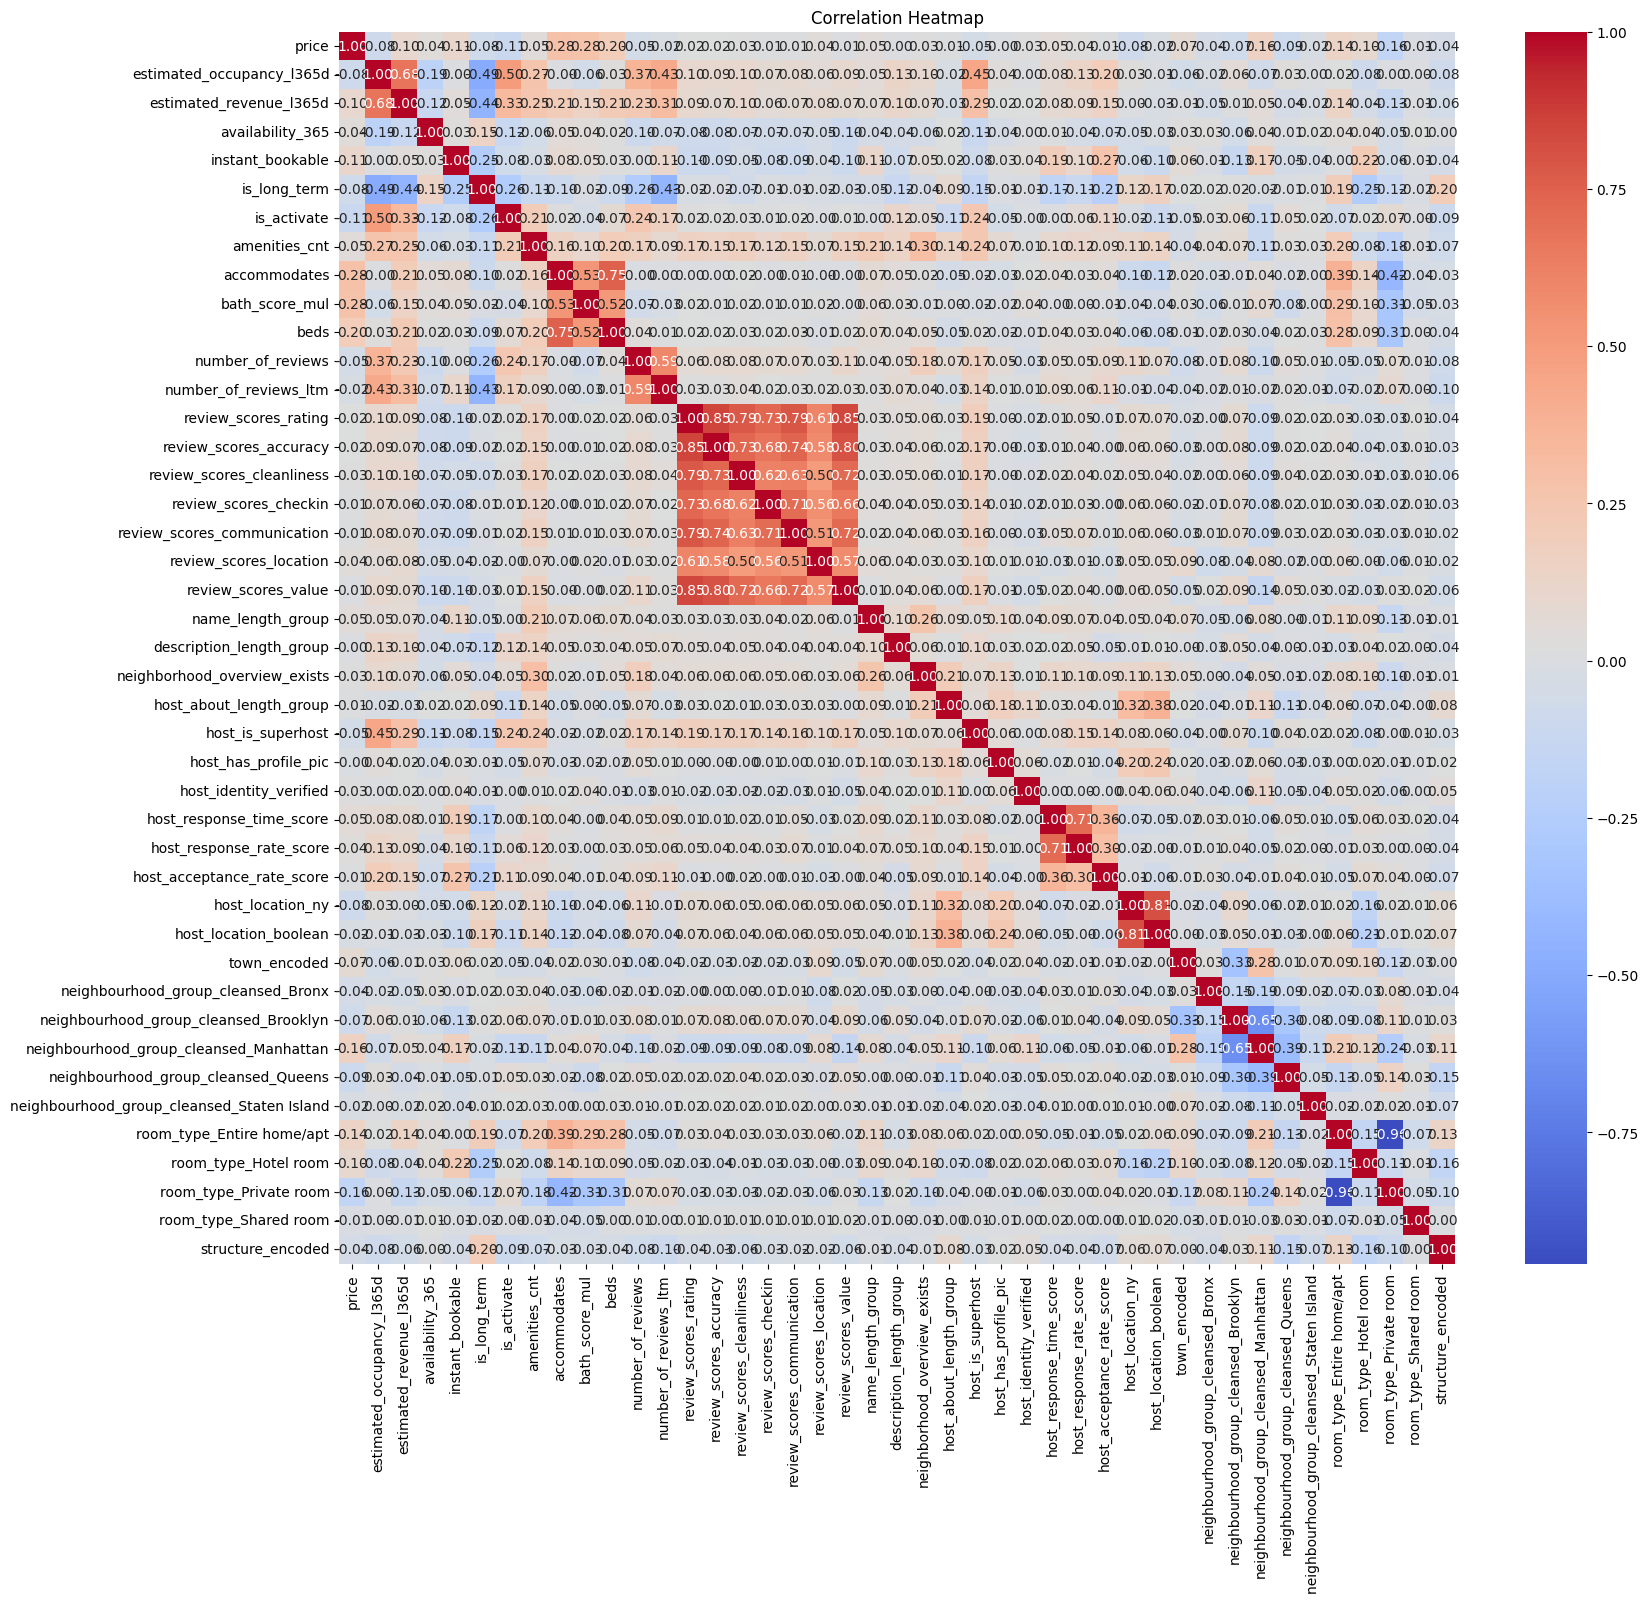

In [49]:
# estimated occupancy rate, estimated revenue rate 각각 상관관계 알아보기

corr_matrix = df.corr(numeric_only=True)

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(18,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [50]:
# df columns list

list(df.columns)

['price',
 'estimated_occupancy_l365d',
 'estimated_revenue_l365d',
 'availability_365',
 'instant_bookable',
 'is_long_term',
 'is_activate',
 'amenities_cnt',
 'accommodates',
 'bath_score_mul',
 'beds',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'name_length_group',
 'description_length_group',
 'neighborhood_overview_exists',
 'host_about_length_group',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_time_score',
 'host_response_rate_score',
 'host_acceptance_rate_score',
 'host_location_ny',
 'host_location_boolean',
 'town_encoded',
 'neighbourhood_group_cleansed_Bronx',
 'neighbourhood_group_cleansed_Brooklyn',
 'neighbourhood_group_cleansed_Manhattan',
 'neighbourhood_group_cleansed_Queens',
 'neighbourhood_group_cleansed_Staten Island',
 'roo

In [51]:
# 'estimated_occupancy_l365d' random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

# 예시 
X = df[['price',
 'availability_365',
 'instant_bookable',
 'is_long_term',
 'is_activate',
 'amenities_cnt',
 'accommodates',
 'bath_score_mul',
 'beds',
 'number_of_reviews',
 'review_scores_rating',
 'name_length_group',
 'description_length_group',
 'neighborhood_overview_exists',
 'host_about_length_group',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate_score',
 'host_acceptance_rate_score',
 'host_location_ny',
 'neighbourhood_group_cleansed_Bronx',
 'neighbourhood_group_cleansed_Brooklyn',
 'neighbourhood_group_cleansed_Manhattan',
 'neighbourhood_group_cleansed_Queens',
 'neighbourhood_group_cleansed_Staten Island',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room']]
y = df['estimated_occupancy_l365d']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


ImportError: cannot import name '_check_n_features' from 'sklearn.utils.validation' (/Users/Jiwon/Documents/GitHub/advanced_project/venv/lib/python3.11/site-packages/sklearn/utils/validation.py)

In [ ]:
# 트레인 테스트 성능 비교
from sklearn.metrics import r2_score, root_mean_squared_error

# 훈련 데이터 예측
y_train_pred = model.predict(X_train)

# 성능 계산
print("Train RMSE:", root_mean_squared_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

print("Test RMSE:", root_mean_squared_error(y_test, y_pred))
print("Test R2:", r2_score(y_test, y_pred))


Train RMSE: 18.86409202969752
Train R2: 0.9620618219213599
Test RMSE: 49.13492924553005
Test R2: 0.7363104042129835


/Users/Jiwon/Documents/GitHub/advanced_project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/advanced_project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/advanced_project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/advanced_project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/advanced_

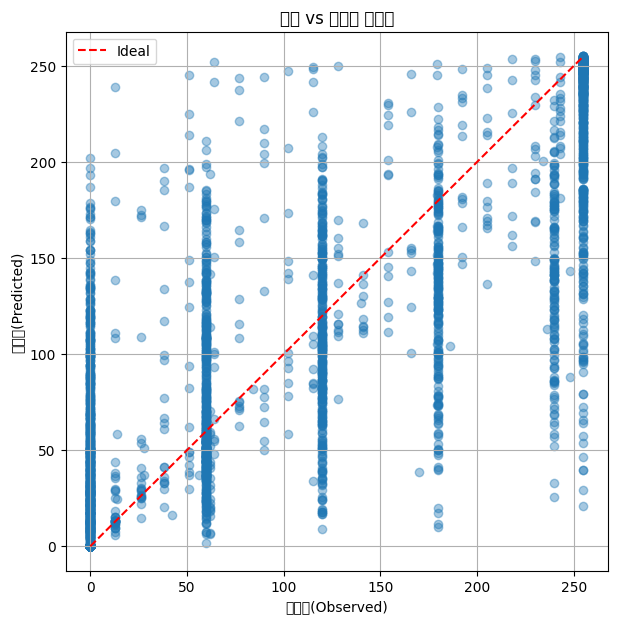

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("실제값(Observed)")
plt.ylabel("예측값(Predicted)")
plt.title("실제 vs 예측값 산점도")
plt.legend()
plt.grid(True)
plt.show()


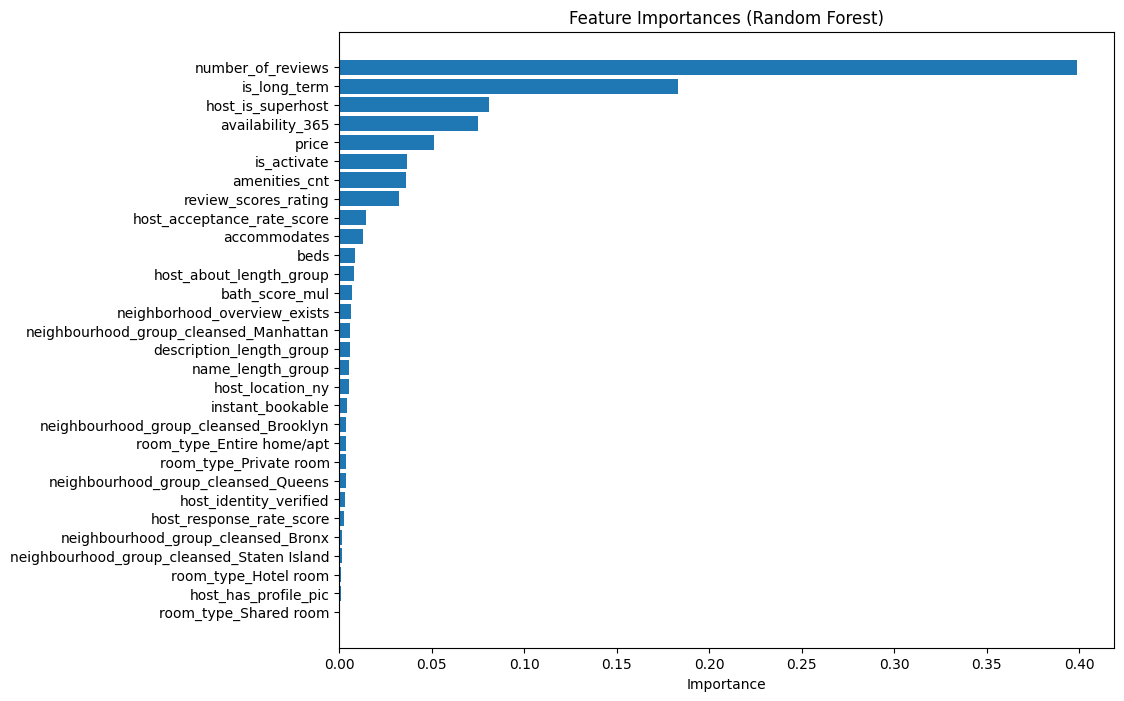

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# feature importance 추출
importances = model.feature_importances_
feature_names = X.columns

# 중요도 순 정렬
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), feature_names[indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()


In [ ]:
# xg boost
import xgboost as xgb


model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE:", root_mean_squared_error(y_test, y_pred))

NameError: name 'X_train' is not defined

In [ ]:
import sys
print(sys.executable)


/Users/Jiwon/Documents/GitHub/advanced_project/venv/bin/python


In [ ]:
import xgboost
print(xgboost.__version__)


3.0.2
